In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/shai-training-2022-a-level-2/sample_submission.csv
/kaggle/input/shai-training-2022-a-level-2/Valid.csv
/kaggle/input/shai-training-2022-a-level-2/Train.csv
/kaggle/input/shai-training-2022-a-level-2/Test.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import nltk
import re 
from wordcloud import WordCloud
import seaborn as seb
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import PorterStemmer
import pickle
import csv
import seaborn as sns
import string
import nltk
import collections       
import matplotlib
import scikitplot as skplt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures , TrigramAssocMeasures
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora, models, similarities
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
import pyLDAvis.gensim
from collections import OrderedDict
from nltk.collocations import BigramCollocationFinder 
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize
from collections import Counter
from wordcloud import WordCloud

%matplotlib inline

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [147]:
from tensorflow import keras as keras
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [5]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [6]:
stop_words = set(STOP_WORDS)
stop_words.update(punctuation) # remove it if you need punctuation 

In [7]:
train = pd.read_csv("../input/shai-training-2022-a-level-2/Train.csv")
test = pd.read_csv("../input/shai-training-2022-a-level-2/Test.csv")
valid = pd.read_csv("../input/shai-training-2022-a-level-2/Valid.csv")

In [8]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, title='Pandas Profiling Report', explorative=True)

In [13]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [13]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [14]:
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [15]:
test.head()

,id,text,label
0,0,I always wrote this series off as being a comp...,NaN
1,1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,NaN
2,2,This movie was so poorly written and directed ...,NaN
3,3,The most interesting thing about Miryang (Secr...,NaN
4,4,"when i first read about ""berlin am meer"" i did...",NaN


In [16]:
train.loc[train.duplicated(), :]

,text,label
2164,"I find it rather useless to comment on this ""m...",0
3236,An absolutely atrocious adaptation of the wond...,0
3428,When I first saw this film it was not an impre...,0
3652,Before I watched this tv movie I did not know ...,1
3787,What a clunker!<br /><br />It MUST have been m...,0
...,...,...
39229,I Enjoyed Watching This Well Acted Movie Very ...,1
39246,You do realize that you've been watching the E...,0
39508,(Spoilers)<br /><br />Oh sure it's based on Mo...,0
39681,It's been a long time since I last saw a movie...,0


In [ ]:
train.duplicated().sum()

In [9]:
train.drop_duplicates(inplace=True)

In [10]:
train.duplicated().sum()

0

In [11]:
valid.duplicated().sum()

2

In [10]:
valid.drop_duplicates(inplace=True)

In [13]:
valid.duplicated().sum()

0

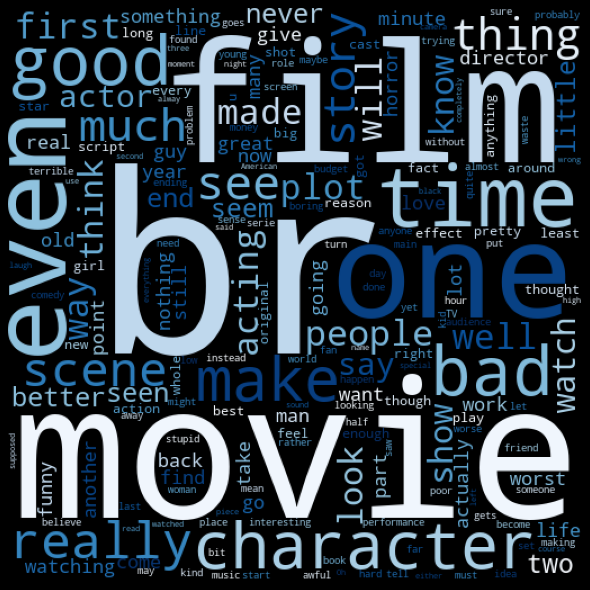

In [93]:
depressive_words = ' '.join(list(train[train['label'] == 0]['text']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

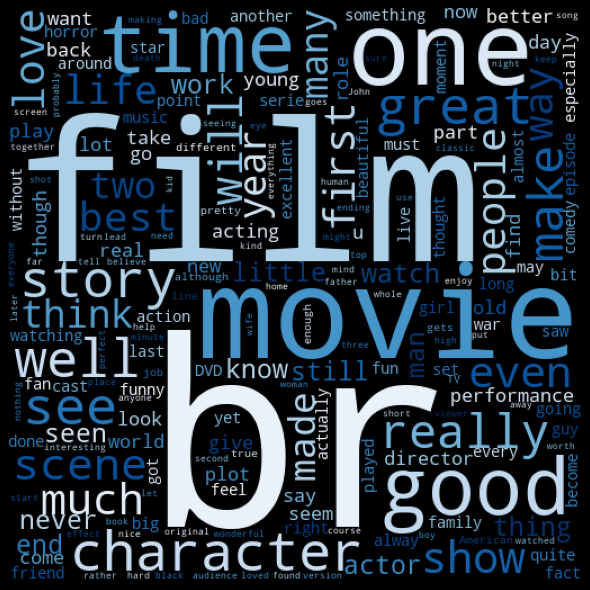

In [94]:
positive_words = ' '.join(list(train[train['label'] == 1]['text']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [25]:
class_df = train.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='winter')

,label,text
1,1,19908
0,0,19815


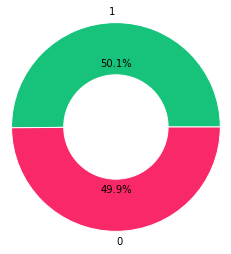

In [26]:
percent_class=class_df.text
class_label= class_df.label
colors = ['#17C37B','#F92969','#FACA0C', '#FF3B49', '#26DE81']
my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=class_label,colors=colors,autopct="%.1f%%")
plt.setp(my_pie, width=0.6, edgecolor='white') 
plt.show()

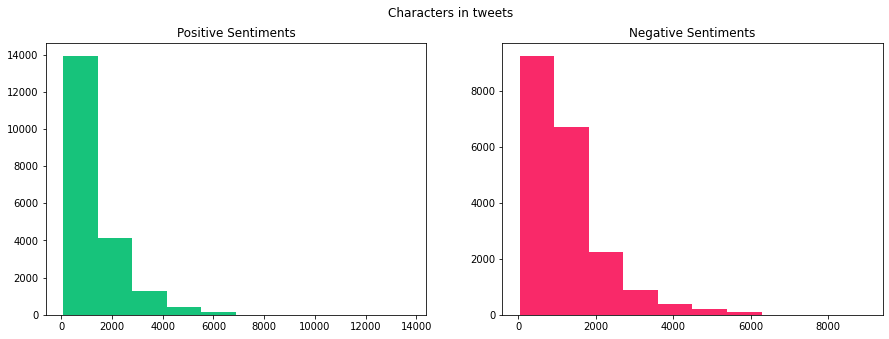

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len=train[train['label']==1]['text'].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentiments')

tweet_len=train[train['label']==0]['text'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentiments')

fig.suptitle('Characters in tweets')
plt.show()

In [11]:
train['cleaned_tweet']  = train['text'].str.lower()
train['cleaned_tweet'].head()

0    i grew up (b. 1965) watching and loving the th...
1    when i put this movie in my dvd player, and sa...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: cleaned_tweet, dtype: object

In [12]:
valid['cleaned_tweet']  = valid['text'].str.lower()
valid['cleaned_tweet'].head()

0    it's been about 14 years since sharon stone aw...
1    someone needed to make a car payment... this i...
2    the guidelines state that a comment must conta...
3    this movie is a muddled mish-mash of clichés f...
4    before stan laurel became the smaller half of ...
Name: cleaned_tweet, dtype: object

In [13]:
test['text']  = test['text'].str.lower()
test['text'].head()

0    i always wrote this series off as being a comp...
1    1st watched 12/7/2002 - 3 out of 10(dir-steve ...
2    this movie was so poorly written and directed ...
3    the most interesting thing about miryang (secr...
4    when i first read about "berlin am meer" i did...
Name: text, dtype: object

In [14]:
#removing punctuation, creating a new column called 'text_punct]'
train['cleaned_tweet'] = train['cleaned_tweet'].str.replace('[^\w\s]','')
train['cleaned_tweet'].head()

0    i grew up b 1965 watching and loving the thund...
1    when i put this movie in my dvd player and sat...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: cleaned_tweet, dtype: object

In [15]:
#removing punctuation, creating a new column called 'text_punct]'
valid['cleaned_tweet'] = valid['cleaned_tweet'].str.replace('[^\w\s]','')
valid['cleaned_tweet'].head()

0    its been about 14 years since sharon stone awa...
1    someone needed to make a car payment this is t...
2    the guidelines state that a comment must conta...
3    this movie is a muddled mishmash of clichés fr...
4    before stan laurel became the smaller half of ...
Name: cleaned_tweet, dtype: object

In [16]:
#removing punctuation, creating a new column called 'text_punct]'
test['text'] = test['text'].str.replace('[^\w\s]','')
test['text'].head()

0    i always wrote this series off as being a comp...
1    1st watched 1272002  3 out of 10dirsteve purce...
2    this movie was so poorly written and directed ...
3    the most interesting thing about miryang secre...
4    when i first read about berlin am meer i didnt...
Name: text, dtype: object

In [17]:
# Applying the stopwords to 'text_punct' and store into 'text_stop'
train["cleaned_tweet"] = train["cleaned_tweet"].apply(lambda x: " ".join([w for w in str(x).split() if not w in stop_words]))
train["cleaned_tweet"].head()

0    grew b 1965 watching loving thunderbirds mates...
1    movie dvd player sat coke chips expectations h...
2    people know particular time past like feel nee...
3    great interest biblical movies bored death min...
4    im die hard dads army fan change got tapes dvd...
Name: cleaned_tweet, dtype: object

In [18]:
# Applying the stopwords to 'text_punct' and store into 'text_stop'
valid["cleaned_tweet"] = valid["cleaned_tweet"].apply(lambda x: " ".join([w for w in str(x).split() if not w in stop_words]))
valid["cleaned_tweet"].head()

0    14 years sharon stone awarded viewers legcross...
1    needed car payment truly awful makes jean clau...
2    guidelines state comment contain minimum lines...
3    movie muddled mishmash clichés recent cinema p...
4    stan laurel smaller half alltime greatest come...
Name: cleaned_tweet, dtype: object

In [19]:
# Applying the stopwords to 'text_punct' and store into 'text_stop'
test["text"] = test["text"].apply(lambda x: " ".join([w for w in str(x).split() if not w in stop_words]))
test["text"].head()

0    wrote series complete stinkfest jim belushi in...
1    1st watched 1272002 3 10dirsteve purcell typic...
2    movie poorly written directed fell asleep 30 m...
3    interesting thing miryang secret sunshine acto...
4    read berlin meer didnt expect thought right pe...
Name: text, dtype: object

In [20]:
# Function to remove emoji.
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)


train["cleaned_tweet"] = train["cleaned_tweet"].apply(lambda x: remove_emoji(str(x)))
train["cleaned_tweet"].head()

0    grew b 1965 watching loving thunderbirds mates...
1    movie dvd player sat coke chips expectations h...
2    people know particular time past like feel nee...
3    great interest biblical movies bored death min...
4    im die hard dads army fan change got tapes dvd...
Name: cleaned_tweet, dtype: object

In [21]:
valid["cleaned_tweet"] = valid["cleaned_tweet"].apply(lambda x: remove_emoji(str(x)))
valid["cleaned_tweet"].head()

0    14 years sharon stone awarded viewers legcross...
1    needed car payment truly awful makes jean clau...
2    guidelines state comment contain minimum lines...
3    movie muddled mishmash clichés recent cinema p...
4    stan laurel smaller half alltime greatest come...
Name: cleaned_tweet, dtype: object

In [22]:
test["text"] = test["text"].apply(lambda x: remove_emoji(str(x)))
test["text"].head()

0    wrote series complete stinkfest jim belushi in...
1    1st watched 1272002 3 10dirsteve purcell typic...
2    movie poorly written directed fell asleep 30 m...
3    interesting thing miryang secret sunshine acto...
4    read berlin meer didnt expect thought right pe...
Name: text, dtype: object

In [23]:
# Function for removing emoticons
def remove_emoticons(tweet):
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
        
        cleaned_tweet = emoji_pattern.sub(r'',tweet)
        return cleaned_tweet

train["cleaned_tweet"] = train["cleaned_tweet"].apply(remove_emoticons)
train["cleaned_tweet"].head()

0    grew b 1965 watching loving thunderbirds mates...
1    movie dvd player sat coke chips expectations h...
2    people know particular time past like feel nee...
3    great interest biblical movies bored death min...
4    im die hard dads army fan change got tapes dvd...
Name: cleaned_tweet, dtype: object

In [24]:
valid["cleaned_tweet"] = valid["cleaned_tweet"].apply(remove_emoticons)
valid["cleaned_tweet"].head()

0    14 years sharon stone awarded viewers legcross...
1    needed car payment truly awful makes jean clau...
2    guidelines state comment contain minimum lines...
3    movie muddled mishmash clichés recent cinema p...
4    stan laurel smaller half alltime greatest come...
Name: cleaned_tweet, dtype: object

In [25]:
test["text"] = test["text"].apply(remove_emoticons)
test["text"].head()

0    wrote series complete stinkfest jim belushi in...
1    1st watched 1272002 3 10dirsteve purcell typic...
2    movie poorly written directed fell asleep 30 m...
3    interesting thing miryang secret sunshine acto...
4    read berlin meer didnt expect thought right pe...
Name: text, dtype: object

In [26]:
def remove_urls(tweet):
    return re.sub(r'http[^\s]*','',tweet)


train["cleaned_tweet"] = train["cleaned_tweet"].apply(remove_urls)
train["cleaned_tweet"].head()

0    grew b 1965 watching loving thunderbirds mates...
1    movie dvd player sat coke chips expectations h...
2    people know particular time past like feel nee...
3    great interest biblical movies bored death min...
4    im die hard dads army fan change got tapes dvd...
Name: cleaned_tweet, dtype: object

In [27]:
valid["cleaned_tweet"] = valid["cleaned_tweet"].apply(remove_urls)
valid["cleaned_tweet"].head()

0    14 years sharon stone awarded viewers legcross...
1    needed car payment truly awful makes jean clau...
2    guidelines state comment contain minimum lines...
3    movie muddled mishmash clichés recent cinema p...
4    stan laurel smaller half alltime greatest come...
Name: cleaned_tweet, dtype: object

In [28]:
test["text"] = test["text"].apply(remove_urls)
test["text"].head()

0    wrote series complete stinkfest jim belushi in...
1    1st watched 1272002 3 10dirsteve purcell typic...
2    movie poorly written directed fell asleep 30 m...
3    interesting thing miryang secret sunshine acto...
4    read berlin meer didnt expect thought right pe...
Name: text, dtype: object

In [29]:
from bs4 import BeautifulSoup
from datetime import datetime

In [30]:
#Function for removing html
def remove_html(tweet):
    return BeautifulSoup(tweet, "lxml").text

train["cleaned_tweet"] = train["cleaned_tweet"].apply(remove_html)
train["cleaned_tweet"].head()

0    grew b 1965 watching loving thunderbirds mates...
1    movie dvd player sat coke chips expectations h...
2    people know particular time past like feel nee...
3    great interest biblical movies bored death min...
4    im die hard dads army fan change got tapes dvd...
Name: cleaned_tweet, dtype: object

In [31]:
valid["cleaned_tweet"] = valid["cleaned_tweet"].apply(remove_html)
valid["cleaned_tweet"].head()

0    14 years sharon stone awarded viewers legcross...
1    needed car payment truly awful makes jean clau...
2    guidelines state comment contain minimum lines...
3    movie muddled mishmash clichés recent cinema p...
4    stan laurel smaller half alltime greatest come...
Name: cleaned_tweet, dtype: object

In [32]:
test["text"] = test["text"].apply(remove_html)
test["text"].head()

0    wrote series complete stinkfest jim belushi in...
1    1st watched 1272002 3 10dirsteve purcell typic...
2    movie poorly written directed fell asleep 30 m...
3    interesting thing miryang secret sunshine acto...
4    read berlin meer didnt expect thought right pe...
Name: text, dtype: object

In [33]:
def remove_mintions(tweet):
    cleaned_tweet = re.sub(r"@\S+",'',tweet)
    return cleaned_tweet

train["cleaned_tweet"] = train["cleaned_tweet"].apply(remove_mintions)
train["cleaned_tweet"].head()

0    grew b 1965 watching loving thunderbirds mates...
1    movie dvd player sat coke chips expectations h...
2    people know particular time past like feel nee...
3    great interest biblical movies bored death min...
4    im die hard dads army fan change got tapes dvd...
Name: cleaned_tweet, dtype: object

In [34]:
valid["cleaned_tweet"] = valid["cleaned_tweet"].apply(remove_mintions)
valid["cleaned_tweet"].head()

0    14 years sharon stone awarded viewers legcross...
1    needed car payment truly awful makes jean clau...
2    guidelines state comment contain minimum lines...
3    movie muddled mishmash clichés recent cinema p...
4    stan laurel smaller half alltime greatest come...
Name: cleaned_tweet, dtype: object

In [35]:
test["text"] = test["text"].apply(remove_mintions)
test["text"].head()

0    wrote series complete stinkfest jim belushi in...
1    1st watched 1272002 3 10dirsteve purcell typic...
2    movie poorly written directed fell asleep 30 m...
3    interesting thing miryang secret sunshine acto...
4    read berlin meer didnt expect thought right pe...
Name: text, dtype: object

In [36]:
def remove_images(tweet):
    cleaned_tweet = re.sub(r"pic\.twitter\.com/\S+",'', tweet)
    cleaned_tweet = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", cleaned_tweet)
    return cleaned_tweet

train["cleaned_tweet"] = train["cleaned_tweet"].apply(remove_images)
train["cleaned_tweet"].head()

0    grew b 1965 watching loving thunderbirds mates...
1    movie dvd player sat coke chips expectations h...
2    people know particular time past like feel nee...
3    great interest biblical movies bored death min...
4    im die hard dads army fan change got tapes dvd...
Name: cleaned_tweet, dtype: object

In [37]:
valid["cleaned_tweet"] = valid["cleaned_tweet"].apply(remove_images)
valid["cleaned_tweet"].head()

0    14 years sharon stone awarded viewers legcross...
1    needed car payment truly awful makes jean clau...
2    guidelines state comment contain minimum lines...
3    movie muddled mishmash clichés recent cinema p...
4    stan laurel smaller half alltime greatest come...
Name: cleaned_tweet, dtype: object

In [38]:
test["text"] = test["text"].apply(remove_images)
test["text"].head()

0    wrote series complete stinkfest jim belushi in...
1    1st watched 1272002 3 10dirsteve purcell typic...
2    movie poorly written directed fell asleep 30 m...
3    interesting thing miryang secret sunshine acto...
4    read berlin meer didnt expect thought right pe...
Name: text, dtype: object

In [39]:
def remove_tweet_digits(tweet):
    cleaned_tweet = re.sub(r'[d]+', r'', tweet)
    cleaned_tweet = re.sub(r'[0-9]*','',cleaned_tweet)
    cleaned_tweet = re.sub(r'([0-9]*\-[0-9]*)*', '', cleaned_tweet)
    return cleaned_tweet 

train["cleaned_tweet"] = train["cleaned_tweet"].apply(remove_tweet_digits)
train["cleaned_tweet"].head()

0    grew b  watching loving thunerbirs mates schoo...
1    movie v player sat coke chips expectations hop...
2    people know particular time past like feel nee...
3    great interest biblical movies bore eath minut...
4    im ie har as army fan change got tapes vs auio...
Name: cleaned_tweet, dtype: object

In [40]:
valid["cleaned_tweet"] = valid["cleaned_tweet"].apply(remove_tweet_digits)
valid["cleaned_tweet"].head()

0     years sharon stone aware viewers legcrossing ...
1    neee car payment truly awful makes jean claues...
2    guielines state comment contain minimum lines ...
3    movie mule mishmash clichés recent cinema prom...
4    stan laurel smaller half alltime greatest come...
Name: cleaned_tweet, dtype: object

In [41]:
test["text"] = test["text"].apply(remove_tweet_digits)
test["text"].head()

0    wrote series complete stinkfest jim belushi in...
1    st watche   irsteve purcell typical mary kate ...
2    movie poorly written irecte fell asleep  minut...
3    interesting thing miryang secret sunshine acto...
4    rea berlin meer int expect thought right peopl...
Name: text, dtype: object

In [42]:
def remove_chars(tweet):
    cleaned_tweet = re.sub(r'[/(){}\[\]\|]', '', tweet)
    cleaned_tweet = re.sub(r'[!$%^?&*><]', '', cleaned_tweet )
    cleaned_tweet = re.sub(r'[\'\"،—.,;+-=]', '', cleaned_tweet )
    cleaned_tweet = re.sub(r'[\n]', '', cleaned_tweet ) # removing \n
    cleaned_tweet =re.sub(r"\s+",' ',cleaned_tweet) # remove_extra_white_space
    return cleaned_tweet

train["cleaned_tweet"] = train["cleaned_tweet"].apply(remove_chars)
train["cleaned_tweet"].head()

0    grew b watching loving thunerbirs mates school...
1    movie v player sat coke chips expectations hop...
2    people know particular time past like feel nee...
3    great interest biblical movies bore eath minut...
4    im ie har as army fan change got tapes vs auio...
Name: cleaned_tweet, dtype: object

In [43]:
valid["cleaned_tweet"] = valid["cleaned_tweet"].apply(remove_chars)
valid["cleaned_tweet"].head()

0     years sharon stone aware viewers legcrossing ...
1    neee car payment truly awful makes jean claues...
2    guielines state comment contain minimum lines ...
3    movie mule mishmash clichés recent cinema prom...
4    stan laurel smaller half alltime greatest come...
Name: cleaned_tweet, dtype: object

In [44]:
test["text"] = test["text"].apply(remove_chars)
test["text"].head()

0    wrote series complete stinkfest jim belushi in...
1    st watche irsteve purcell typical mary kate as...
2    movie poorly written irecte fell asleep minute...
3    interesting thing miryang secret sunshine acto...
4    rea berlin meer int expect thought right peopl...
Name: text, dtype: object

In [148]:
# !pip install swifter

In [48]:
import swifter

In [50]:
# sents = []
# tokens = []
lemma = []
# pos = []
# ner = []


nlp = spacy.load('en_core_web_sm')

t0 = datetime.now()

# suppress numpy warnings
np.warnings.filterwarnings('ignore')

for tweet in nlp.pipe(train['cleaned_tweet'], batch_size=100, n_process=3):
    if tweet.is_parsed:
#         tokens.append([e.text for e in tweet])
#         sents.append([sent.text.strip() for sent in tweet.sents])
#         pos.append([e.pos_ for e in tweet])
#         ner.append([e.text for e in tweet.ents])
        lemma.append([n.lemma_ for n in tweet])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
#         tokens.append(None)
        lemma.append(None)
#         pos.append(None)
#         sents.append(None)
#         ner.append(None)

# train['tokens'] = tokens
train['lemma'] = lemma
# train['pos'] = pos
# train['sents'] = sents
# train['ner'] = ner

t1 = datetime.now()
print('Processing time: {}'.format(t1 - t0))

Processing time: 0:06:52.981907


In [51]:
# sents = []
# tokens = []
lemma = []
# pos = []
# ner = []


nlp = spacy.load('en_core_web_sm')

t0 = datetime.now()

# suppress numpy warnings
np.warnings.filterwarnings('ignore')

for tweet in nlp.pipe(valid['cleaned_tweet'], batch_size=100, n_process=3):
    if tweet.is_parsed:
#         tokens.append([e.text for e in tweet])
#         sents.append([sent.text.strip() for sent in tweet.sents])
#         pos.append([e.pos_ for e in tweet])
#         ner.append([e.text for e in tweet.ents])
        lemma.append([n.lemma_ for n in tweet])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
#         tokens.append(None)
        lemma.append(None)
#         pos.append(None)
#         sents.append(None)
#         ner.append(None)

# valid['tokens'] = tokens
valid['lemma'] = lemma
# valid['pos'] = pos
# valid['sents'] = sents
# valid['ner'] = ner

t1 = datetime.now()
print('Processing time: {}'.format(t1 - t0))

Processing time: 0:01:00.452526


In [52]:
# sents = []
# tokens = []
lemma = []
# pos = []
# ner = []


nlp = spacy.load('en_core_web_sm')

t0 = datetime.now()

# suppress numpy warnings
np.warnings.filterwarnings('ignore')

for tweet in nlp.pipe(test['cleaned_tweet'], batch_size=100, n_process=3):
    if tweet.is_parsed:
#         tokens.append([e.text for e in tweet])
#         sents.append([sent.text.strip() for sent in tweet.sents])
#         pos.append([e.pos_ for e in tweet])
#         ner.append([e.text for e in tweet.ents])
        lemma.append([n.lemma_ for n in tweet])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
#         tokens.append(None)
        lemma.append(None)
#         pos.append(None)
#         sents.append(None)
#         ner.append(None)

# valid['tokens'] = tokens
test['lemma'] = lemma
# valid['pos'] = pos
# valid['sents'] = sents
# valid['ner'] = ner

t1 = datetime.now()
print('Processing time: {}'.format(t1 - t0))

Processing time: 0:00:57.624760


In [58]:
# Lemmatized essays re-joined (list to essay)
train['l_essay'] = train['lemma'].swifter.apply(' '.join)

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

In [59]:
# Lemmatized essays re-joined (list to essay)
valid['l_essay'] = valid['lemma'].swifter.apply(' '.join)

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

In [60]:
# Lemmatized essays re-joined (list to essay)
test['l_essay'] = test['lemma'].swifter.apply(' '.join)

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

In [61]:
test['l_essay']

0       write series complete stinkf jim belushi invol...
1       st watche irsteve purcell typical mary kate as...
2       movie poorly write irecte fall asleep minute m...
3       interesting thing miryang secret sunshine acto...
4       rea berlin meer int expect think right people ...
                              ...                        
4995    kin picture john lassiter make toay be not ava...
4996    see whippe press screen hilarious talk nonstop...
4997    nbc ashame woulnt allow chilren efinitely tell...
4998    movie clumsy mishmash ghoststory suspensethril...
4999    formula movie illegitimate son rich chilenian ...
Name: l_essay, Length: 5000, dtype: object

In [49]:
train['l_essay']  = train['cleaned_tweet'].str.lower()
train['l_essay'].head()

0    grew b watching loving thunerbirs mates school...
1    movie v player sat coke chips expectations hop...
2    people know particular time past like feel nee...
3    great interest biblical movies bore eath minut...
4    im ie har as army fan change got tapes vs auio...
Name: l_essay, dtype: object

In [50]:
valid['l_essay']  = valid['cleaned_tweet'].str.lower()
valid['l_essay'].head()

0     years sharon stone aware viewers legcrossing ...
1    neee car payment truly awful makes jean claues...
2    guielines state comment contain minimum lines ...
3    movie mule mishmash clichés recent cinema prom...
4    stan laurel smaller half alltime greatest come...
Name: l_essay, dtype: object

In [51]:
test['l_essay']  = test['text'].str.lower()
test.head()

,id,text,label,l_essay
0,0,wrote series complete stinkfest jim belushi in...,NaN,wrote series complete stinkfest jim belushi in...
1,1,st watche irsteve purcell typical mary kate as...,NaN,st watche irsteve purcell typical mary kate as...
2,2,movie poorly written irecte fell asleep minute...,NaN,movie poorly written irecte fell asleep minute...
3,3,interesting thing miryang secret sunshine acto...,NaN,interesting thing miryang secret sunshine acto...
4,4,rea berlin meer int expect thought right peopl...,NaN,rea berlin meer int expect thought right peopl...


In [52]:
def remove_single_char_func(text, threshold=1):
    '''
    Removes single characters from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes words whose length falls below the threshold (by default = 1)
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with removed words whose length was below the threshold (by default = 1)
    ''' 
    threshold = threshold
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if len(word) > threshold])
    return text

In [53]:
train['l_essay']  = train['l_essay'].swifter.apply(remove_single_char_func)
train.head()

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

,text,label,cleaned_tweet,l_essay
0,I grew up (b. 1965) watching and loving the Th...,0,grew b watching loving thunerbirs mates school...,grew watching loving thunerbirs mates school w...
1,"When I put this movie in my DVD player, and sa...",0,movie v player sat coke chips expectations hop...,movie player sat coke chips expectations hopin...
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,great interest biblical movies bore eath minut...,great interest biblical movies bore eath minut...
4,Im a die hard Dads Army fan and nothing will e...,1,im ie har as army fan change got tapes vs auio...,im ie har as army fan change got tapes vs auio...


In [54]:
valid['l_essay']  =valid['l_essay'].swifter.apply(remove_single_char_func)
valid.head()

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

,text,label,cleaned_tweet,l_essay
0,It's been about 14 years since Sharon Stone aw...,0,years sharon stone aware viewers legcrossing ...,years sharon stone aware viewers legcrossing t...
1,someone needed to make a car payment... this i...,0,neee car payment truly awful makes jean claues...,neee car payment truly awful makes jean claues...
2,The Guidelines state that a comment must conta...,0,guielines state comment contain minimum lines ...,guielines state comment contain minimum lines ...
3,This movie is a muddled mish-mash of clichés f...,0,movie mule mishmash clichés recent cinema prom...,movie mule mishmash clichés recent cinema prom...
4,Before Stan Laurel became the smaller half of ...,0,stan laurel smaller half alltime greatest come...,stan laurel smaller half alltime greatest come...


In [55]:
test['l_essay']  =test['l_essay'].swifter.apply(remove_single_char_func)
test.head()

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

,id,text,label,l_essay
0,0,wrote series complete stinkfest jim belushi in...,NaN,wrote series complete stinkfest jim belushi in...
1,1,st watche irsteve purcell typical mary kate as...,NaN,st watche irsteve purcell typical mary kate as...
2,2,movie poorly written irecte fell asleep minute...,NaN,movie poorly written irecte fell asleep minute...
3,3,interesting thing miryang secret sunshine acto...,NaN,interesting thing miryang secret sunshine acto...
4,4,rea berlin meer int expect thought right peopl...,NaN,rea berlin meer int expect thought right peopl...


In [56]:
train["l_essay"] = train.swifter.apply(lambda x: remove_single_char_func(x["l_essay"], threshold=2), axis = 1)

Pandas Apply:   0%|          | 0/39723 [00:00<?, ?it/s]

In [57]:
valid["l_essay"] = valid.swifter.apply(lambda x: remove_single_char_func(x["l_essay"], threshold=2), axis = 1)

Pandas Apply:   0%|          | 0/4998 [00:00<?, ?it/s]

In [58]:
test["l_essay"] = test.swifter.apply(lambda x: remove_single_char_func(x["l_essay"], threshold=2), axis = 1)

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

In [59]:
test["l_essay"]

0       wrote series complete stinkfest jim belushi in...
1       watche irsteve purcell typical mary kate ashle...
2       movie poorly written irecte fell asleep minute...
3       interesting thing miryang secret sunshine acto...
4       rea berlin meer int expect thought right peopl...
                              ...                        
4995    kin picture john lassiter making toay werent a...
4996    saw whippe press screening hilarious talking n...
4997    nbc ashame woulnt allow chilren efinitely tell...
4998    movie clumsy mishmash ghoststory suspensethril...
4999    formula movie illegitimate son rich chilenian ...
Name: l_essay, Length: 5000, dtype: object

In [ ]:
train.to_pickle('train.pkl')

In [64]:
valid.to_pickle('valid.pkl')

In [65]:
test.to_pickle('test.pkl')

In [61]:
# train= pd.read_pickle('./train.pkl')

In [62]:
# valid = pd.read_pickle('./valid.pkl')

In [63]:
# test = pd.read_pickle('./valid.pkl')

In [64]:
def find_ngrams(data):
    class_text = " ".join(data.tolist())
    tokens= TweetTokenizer().tokenize(class_text)
  #unigram
    print('uni_gram -> HighFreq:')
    unigram_freq = nltk.ngrams(tokens, 1)
    unigram_freq=nltk.FreqDist(unigram_freq)
    print(unigram_freq.most_common()[:10])
    print('uni_gram -> LowFreq:')
    print(unigram_freq.most_common()[-10:])
    print('\n')
  
 #bigram
    print('bi_gram -> HighFreq:')
    bigram_freq = nltk.ngrams(tokens, 2)
    bigram_freq=nltk.FreqDist(bigram_freq)
    print(bigram_freq.most_common()[:10])
    print('bi_gram -> LowFreq:')
    print(bigram_freq.most_common()[-10:])
    print('\n')
    
  #trigram
    print('tri_gram -> HighFreq:')
    trigram_freq = nltk.ngrams(tokens, 3)
    trigram_freq=nltk.FreqDist(trigram_freq)
    print(trigram_freq.most_common()[:10])
    print('tri_gram -> LowFreq:')
    print(trigram_freq.most_common()[-10:])

In [65]:
find_ngrams(train[train['label'] == 0]['l_essay'])

uni_gram -> HighFreq:
[(('movie',), 37707), (('film',), 27807), (('like',), 18203), (('goo',), 11382), (('time',), 9172), (('ont',), 8119), (('story',), 7689), (('people',), 7238), (('movies',), 6652), (('acting',), 6247)]
uni_gram -> LowFreq:
[(('aaghh',), 1), (('ollarswhen',), 1), (('alchoholics',), 1), (('slurrings',), 1), (('teas',), 1), (('trainspottingaye',), 1), (('seascape',), 1), (('nets',), 1), (('oars',), 1), (('fishermenbr',), 1)]


bi_gram -> HighFreq:
[(('ive', 'seen'), 1475), (('waste', 'time'), 1169), (('special', 'effects'), 1097), (('ont', 'know'), 1066), (('looks', 'like'), 1003), (('look', 'like'), 764), (('low', 'buget'), 679), (('watch', 'movie'), 618), (('movie', 'like'), 608), (('worst', 'movie'), 592)]
bi_gram -> LowFreq:
[(('flail', 'staggering'), 1), (('staggering', 'finally'), 1), (('finally', 'meloramatic'), 1), (('meloramatic', 'absur'), 1), (('youre', 'oltime'), 1), (('oltime', 'tuna'), 1), (('tuna', 'fishing'), 1), (('fishing', 'pass'), 1), (('pass', 'ho

In [66]:
find_ngrams(train[train['label'] == 1]['l_essay'])

uni_gram -> HighFreq:
[(('film',), 31313), (('movie',), 28815), (('like',), 15250), (('goo',), 11497), (('great',), 10130), (('story',), 9874), (('time',), 9416), (('love',), 8604), (('films',), 6838), (('people',), 6717)]
uni_gram -> LowFreq:
[(('paeophiliac',), 1), (('amnesic',), 1), (('canolis',), 1), (('jazzplaying',), 1), (('cronjager',), 1), (('cosmeticbr',), 1), (('welby',), 1), (('ughbr',), 1), (('nook',), 1), (('cranny',), 1)]


bi_gram -> HighFreq:
[(('ive', 'seen'), 1249), (('ont', 'know'), 737), (('new', 'york'), 612), (('special', 'effects'), 612), (('years', 'ago'), 571), (('great', 'movie'), 565), (('goo', 'movie'), 533), (('love', 'movie'), 500), (('like', 'movie'), 482), (('real', 'life'), 462)]
bi_gram -> LowFreq:
[(('exact', 'tearjerker'), 1), (('tearjerker', 'sountrack'), 1), (('best', 'heaven'), 1), (('heaven', 'home'), 1), (('home', 'ben'), 1), (('ben', 'chains'), 1), (('chains', 'fools'), 1), (('fools', 'great'), 1), (('respect', 'rea'), 1), (('comment', 'bye'), 

In [60]:
# Checking the first 10 most frequent words
from collections import Counter
cnt_train = Counter()
for text in train["l_essay"].values:
    for word in text.split():
        cnt_train[word] += 1

cnt_train.most_common(10)

[('movie', 66521),
 ('film', 59119),
 ('like', 33453),
 ('goo', 22879),
 ('time', 18587),
 ('story', 17562),
 ('great', 14139),
 ('people', 13955),
 ('ont', 13463),
 ('love', 12469)]

In [61]:
# Checking the first 10 most frequent words
from collections import Counter
cnt_valid = Counter()
for text in valid["l_essay"].values:
    for word in text.split():
        cnt_valid[word] += 1

cnt_valid.most_common(10)

[('movie', 8340),
 ('film', 7386),
 ('like', 4118),
 ('goo', 2781),
 ('time', 2277),
 ('story', 2232),
 ('great', 1806),
 ('people', 1753),
 ('ont', 1659),
 ('movies', 1565)]

In [62]:
# Checking the first 10 most frequent words
from collections import Counter
cnt_test = Counter()
for text in test["l_essay"].values:
    for word in text.split():
        cnt_test[word] += 1

cnt_test.most_common(10)

[('movie', 8175),
 ('film', 7641),
 ('like', 4099),
 ('goo', 2819),
 ('time', 2332),
 ('story', 2205),
 ('great', 1789),
 ('people', 1731),
 ('ont', 1723),
 ('way', 1512)]

In [60]:
all_tweet = " ".join(train['l_essay'].tolist())
tokenizer = TweetTokenizer()
tokens = tokenizer.tokenize(all_tweet)
counts_all = collections.Counter(tokens)
#The most common words 
counts_all.most_common(10)
counts_all_df = pd.DataFrame(counts_all.most_common(10), columns=['words', 'count'])
counts_all_df.head(10)

,words,count
0,movie,66522
1,film,59120
2,like,33453
3,goo,22879
4,time,18588
5,story,17563
6,great,14139
7,people,13955
8,ont,13463
9,love,12469


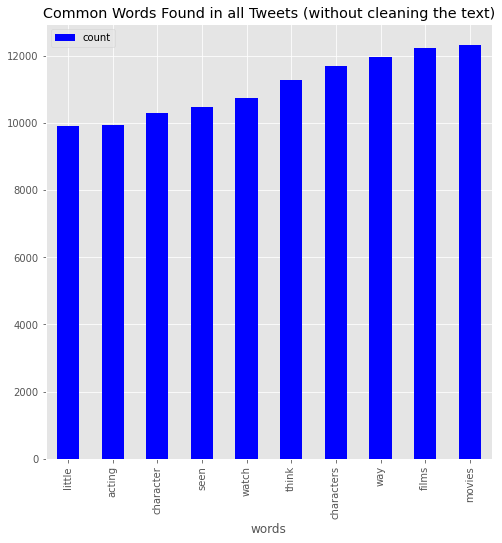

In [86]:
fig, ax = plt.subplots(figsize=(8, 8))

counts_all_df.sort_values(by='count').plot(x='words',y='count',ax=ax,color="blue",kind='bar')

ax.set_title("Common Words Found in all Tweets (without cleaning the text)")

plt.show()

In [63]:
# Removing the frequent words
freq = set([w for (w, wc) in cnt_train.most_common(10)])
# function to remove the frequent words
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not 
in freq])
# Passing the function freqwords
train["l_essay"] = train["l_essay"].apply(freqwords)
train["l_essay"].head()

0    grew watching loving thunerbirs mates school w...
1    player sat coke chips expectations hoping cont...
2    know particular past feel nee try efine replac...
3    interest biblical movies bore eath minute long...
4    har army fan change got tapes auiobooks watchl...
Name: l_essay, dtype: object

In [64]:
# Removing the frequent words
freq = set([w for (w, wc) in cnt_valid.most_common(10)])
# function to remove the frequent words
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not 
in freq])
# Passing the function freqwords
valid["l_essay"] = valid["l_essay"].apply(freqwords)
valid["l_essay"].head()

0    years sharon stone aware viewers legcrossing t...
1    neee car payment truly awful makes jean claues...
2    guielines state comment contain minimum lines ...
3    mule mishmash clichés recent cinema promising ...
4    stan laurel smaller half alltime greatest come...
Name: l_essay, dtype: object

In [65]:
# Removing the frequent words
freq = set([w for (w, wc) in cnt_test.most_common(10)])
# function to remove the frequent words
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not 
in freq])
# Passing the function freqwords
test["l_essay"] = test["l_essay"].apply(freqwords)
test["l_essay"].head()

0    wrote series complete stinkfest jim belushi in...
1    watche irsteve purcell typical mary kate ashle...
2    poorly written irecte fell asleep minutes joke...
3    interesting thing miryang secret sunshine acto...
4    rea berlin meer int expect thought right right...
Name: l_essay, dtype: object

In [66]:
cnt_train.most_common()[-10:]

[('paeophiliac', 1),
 ('amnesic', 1),
 ('canolis', 1),
 ('jazzplaying', 1),
 ('trainspottingaye', 1),
 ('cronjager', 1),
 ('cosmeticbr', 1),
 ('seascape', 1),
 ('oars', 1),
 ('fishermenbr', 1)]

In [67]:
cnt_valid.most_common()[-10:]

[('futz', 1),
 ('congress', 1),
 ('ohorgan', 1),
 ('broawaybr', 1),
 ('easytotake', 1),
 ('convolutions', 1),
 ('therefrom', 1),
 ('antiseptic', 1),
 ('rumbling', 1),
 ('psychoramatic', 1)]

In [68]:
cnt_test.most_common()[-10:]

[('juah', 1),
 ('omke', 1),
 ('zorie', 1),
 ('whippecom', 1),
 ('ghoststory', 1),
 ('seatjumper', 1),
 ('crapula', 1),
 ('boogeymen', 1),
 ('superstitions', 1),
 ('mcowells', 1)]

In [69]:
# Removal of 10 rare words 
freq = pd.Series(' '.join(train["l_essay"]).split()).value_counts()[-10:] # 10 rare words
freq = list(freq.index)
train["l_essay"] = train["l_essay"].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train["l_essay"].head()

0    grew watching loving thunerbirs mates school w...
1    player sat coke chips expectations hoping cont...
2    know particular past feel nee try efine replac...
3    interest biblical movies bore eath minute long...
4    har army fan change got tapes auiobooks watchl...
Name: l_essay, dtype: object

In [70]:
# Removal of 10 rare words 
freq = pd.Series(' '.join(valid["l_essay"]).split()).value_counts()[-10:] # 10 rare words
freq = list(freq.index)
valid["l_essay"] = valid["l_essay"].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
valid["l_essay"].head()

0    years sharon stone aware viewers legcrossing t...
1    neee car payment truly awful makes jean claues...
2    guielines state comment contain minimum lines ...
3    mule mishmash clichés recent cinema promising ...
4    stan laurel smaller half alltime greatest come...
Name: l_essay, dtype: object

In [71]:
# Removal of 10 rare words 
freq = pd.Series(' '.join(test["l_essay"]).split()).value_counts()[-10:] # 10 rare words
freq = list(freq.index)
test["l_essay"] = test["l_essay"].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
test["l_essay"].head()

0    wrote series complete stinkfest jim belushi in...
1    watche irsteve purcell typical mary kate ashle...
2    poorly written irecte fell asleep minutes joke...
3    interesting thing miryang secret sunshine acto...
4    rea berlin meer int expect thought right right...
Name: l_essay, dtype: object

In [72]:
y_valid=valid['label']

In [73]:
y=train['label']

In [75]:
train['l_essay']

0        grew watching loving thunerbirs mates school w...
1        player sat coke chips expectations hoping cont...
2        know particular past feel nee try efine replac...
3        interest biblical movies bore eath minute long...
4        har army fan change got tapes auiobooks watchl...
                               ...                        
39995    western union forgotten classic western reason...
39996    increible piece work explores nook cranny huma...
39997    wife watche plan visit sicily stromboli soon f...
39998    watche flatliners amaze necessary features cas...
39999    gross estimate awar nominations john travolta ...
Name: l_essay, Length: 39723, dtype: object

In [74]:
X_train, X_test, y_train, y_test = train_test_split(train['l_essay'], y, test_size=0.2, random_state=42 ,stratify=y)

In [75]:
print ("Training set shapes:", X_train.shape, y_train.shape)
print ("Test set shapes:", X_test.shape, y_test.shape)

Training set shapes: (31778,) (31778,)
Test set shapes: (7945,) (7945,)


In [70]:
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
def report(y_true, y_pred, labels):
    cm = pd.DataFrame(confusion_matrix(y_true=y_true, y_pred=y_pred),index=labels, columns=labels)
    rep = classification_report(y_true=y_true, y_pred=y_pred)
    acc_score=accuracy_score(y_true=y_true, y_pred=y_pred)
    return (f'accuracy_score:\n {acc_score}\n\nConfusion Matrix:\n{cm}\n\nClassification Report:\n{rep}')

In [98]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=3,max_df=0.3,ngram_range=(1,3),binary=False)
#transformed train reviews
cv_train=cv.fit_transform(X_train)
#transformed test reviews
cv_test=cv.transform(X_test)

print('BOW_cv_train:',cv_train.shape)
print('BOW_cv_test:',cv_test.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (31778, 183614)
BOW_cv_test: (7945, 183614)


In [99]:
test_cv=cv.transform(test['l_essay'])
print('BOW_test_cv:',test_cv.shape)

BOW_test_cv: (5000, 183614)


In [100]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=3,max_df=0.3,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train=tv.fit_transform(X_train)
#transformed test reviews
tv_test=tv.transform(X_test)
print('Tfidf_train:',tv_train.shape)
print('Tfidf_test:',tv_test.shape)

Tfidf_train: (31778, 183614)
Tfidf_test: (7945, 183614)


In [101]:
test_tv=tv.transform(test['l_essay'])
print('Tfidf_test_tv:',test_tv.shape)

Tfidf_test_tv: (5000, 183614)


In [114]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = [0.01, 0.1, 0.5, 1.0, 5.0,10]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(tv_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.889697 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.838788 (0.003485) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.838807 (0.003477) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.838995 (0.003525) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.498836 (0.000059) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.855000 (0.003931) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.855000 (0.003934) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.855032 (0.003936) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}
0.769205 (0.003968) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.875209 (0.003866)

In [103]:
lr= LogisticRegression(C=10, penalty='l2', solver='lbfgs')
#training the model
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train,y_train)
print(lr_tfidf)

LogisticRegression(C=10)
LogisticRegression(C=10)


In [104]:
#Predicting the model for bag of words
lr_bow_predict=lr_bow.predict(cv_test)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr_tfidf.predict(tv_test)
print(lr_tfidf_predict)

[0 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]


In [105]:
print(report(y_test,lr_bow_predict, lr_bow.classes_ ))

accuracy_score:
 0.8852108244178729

Confusion Matrix:
      0     1
0  3429   534
1   378  3604

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3963
           1       0.87      0.91      0.89      3982

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



In [106]:
print(report(y_test,lr_tfidf_predict,lr_tfidf.classes_ ))

accuracy_score:
 0.8955317809943361

Confusion Matrix:
      0     1
0  3492   471
1   359  3623

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      3963
           1       0.88      0.91      0.90      3982

    accuracy                           0.90      7945
   macro avg       0.90      0.90      0.90      7945
weighted avg       0.90      0.90      0.90      7945



In [102]:
pip install skplt

ERROR: Could not find a version that satisfies the requirement skplt (from versions: none)
ERROR: No matching distribution found for skplt
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

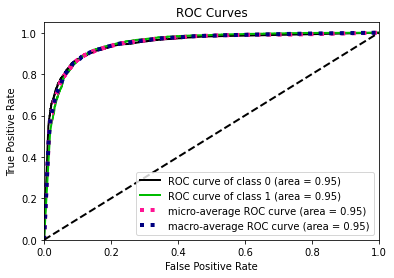

In [109]:
skplt.metrics.plot_roc(y_test,lr_bow.predict_proba(cv_test))

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

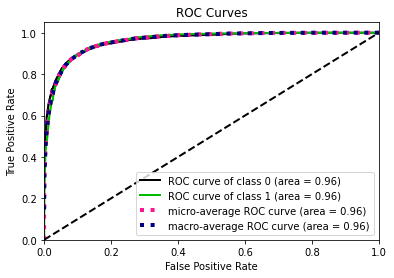

In [110]:
skplt.metrics.plot_roc(y_test,lr_tfidf.predict_proba(tv_test))

In [ ]:
test

In [ ]:
preds=grid_result.predict(test_tv)

In [121]:
preds

array([0, 0, 0, ..., 0, 0, 1])

In [114]:
import math
alpha = [10**x for x in range(-4,4)]
penalty = ["l1","l2"]
grid_params ={'alpha':alpha,'penalty':penalty}
alpha_log = [math.log(x,10) for x in grid_params["alpha"]]

SGDClassifier_model = GridSearchCV(SGDClassifier(), grid_params,
                     scoring = 'accuracy', cv=5,n_jobs=-1, return_train_score=True)

grid_result = SGDClassifier_model.fit(cv_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.877368 using {'alpha': 0.01, 'penalty': 'l2'}
0.842847 (0.003605) with: {'alpha': 0.0001, 'penalty': 'l1'}
0.871106 (0.003058) with: {'alpha': 0.0001, 'penalty': 'l2'}
0.836176 (0.003416) with: {'alpha': 0.001, 'penalty': 'l1'}
0.876518 (0.002213) with: {'alpha': 0.001, 'penalty': 'l2'}
0.772736 (0.003338) with: {'alpha': 0.01, 'penalty': 'l1'}
0.877368 (0.002856) with: {'alpha': 0.01, 'penalty': 'l2'}
0.558653 (0.070394) with: {'alpha': 0.1, 'penalty': 'l1'}
0.848511 (0.001727) with: {'alpha': 0.1, 'penalty': 'l2'}
0.499748 (0.001138) with: {'alpha': 1, 'penalty': 'l1'}
0.799830 (0.003043) with: {'alpha': 1, 'penalty': 'l2'}
0.500252 (0.001138) with: {'alpha': 10, 'penalty': 'l1'}
0.784820 (0.006008) with: {'alpha': 10, 'penalty': 'l2'}
0.499780 (0.001145) with: {'alpha': 100, 'penalty': 'l1'}
0.660048 (0.005040) with: {'alpha': 100, 'penalty': 'l2'}
0.500252 (0.001138) with: {'alpha': 1000, 'penalty': 'l1'}
0.501259 (0.000453) with: {'alpha': 1000, 'penalty': 'l2'}


In [121]:
#training the linear svm
svm=SGDClassifier(class_weight='balanced',penalty='l1',random_state=42)


#fitting the svm for bag of words
svm_bow=svm.fit(cv_train,y_train)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train,y_train)
print(svm_tfidf)

SGDClassifier(class_weight='balanced', penalty='l1', random_state=42)
SGDClassifier(class_weight='balanced', penalty='l1', random_state=42)


In [122]:
#Predicting the model for bag of words
svm_bow_predict=svm_bow.predict(cv_test)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm_tfidf.predict(tv_test)
print(svm_tfidf_predict)

[0 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]


In [125]:
print(report(y_test,svm_bow_predict,svm_bow.classes_ ))

accuracy_score:
 0.8469477658904971

Confusion Matrix:
      0     1
0  3395   568
1   648  3334

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3963
           1       0.85      0.84      0.85      3982

    accuracy                           0.85      7945
   macro avg       0.85      0.85      0.85      7945
weighted avg       0.85      0.85      0.85      7945



In [ ]:
print(report(y_test,svm_tfidf_predict, svm_tfidf.classes_ ))

In [120]:
grid_params ={'alpha':[10**x for x in range(-4,4)]}
alpha_log = [math.log(x,10) for x in grid_params["alpha"]]

MultinomialNB_model = GridSearchCV(MultinomialNB(),grid_params,
                     scoring = 'roc_auc', cv=5,n_jobs=-1, return_train_score=True)
grid_result = MultinomialNB_model.fit(cv_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.934384 using {'alpha': 1}
0.906009 (0.003261) with: {'alpha': 0.0001}
0.914387 (0.002877) with: {'alpha': 0.001}
0.923014 (0.002561) with: {'alpha': 0.01}
0.931057 (0.001718) with: {'alpha': 0.1}
0.934384 (0.001277) with: {'alpha': 1}
0.928409 (0.001506) with: {'alpha': 10}
0.916694 (0.002328) with: {'alpha': 100}
0.900018 (0.001965) with: {'alpha': 1000}


In [121]:
from sklearn.naive_bayes import MultinomialNB
#training the model
mnb=MultinomialNB(alpha=1)
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train,y_train)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train,y_train)
print(mnb_tfidf)

MultinomialNB(alpha=1)
MultinomialNB(alpha=1)


In [122]:
#Predicting the model for bag of words
mnb_bow_predict=mnb_bow.predict(cv_test)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb_tfidf.predict(tv_test)
print(mnb_tfidf_predict)

[0 0 1 ... 1 1 1]
[0 0 1 ... 1 1 1]


In [123]:
print(report(y_test,mnb_bow_predict, mnb_bow.classes_ ))

accuracy_score:
 0.8733794839521711

Confusion Matrix:
      0     1
0  3470   493
1   513  3469

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3963
           1       0.88      0.87      0.87      3982

    accuracy                           0.87      7945
   macro avg       0.87      0.87      0.87      7945
weighted avg       0.87      0.87      0.87      7945



In [125]:
print(report(y_test,mnb_tfidf_predict, mnb_tfidf.classes_ ))

accuracy_score:
 0.8755191944619257

Confusion Matrix:
      0     1
0  3443   520
1   469  3513

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3963
           1       0.87      0.88      0.88      3982

    accuracy                           0.88      7945
   macro avg       0.88      0.88      0.88      7945
weighted avg       0.88      0.88      0.88      7945



In [129]:
# XGBoost
# n_jobs=-1 to allow run it on all cores
# from sklearn.model_selection import GridSearchCV, KFold
# params = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01,0.05,0.1],
#     'booster': ['gbtree', 'gblinear'],
#     'gamma': [0, 0.5, 1],
#     'reg_alpha': [0, 0.5, 1],
#     'reg_lambda': [0.5, 1, 5],
#     'base_score': [0.2, 0.5, 1]
# }

# gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
# gs2.fit(cv_train, y_train)

# print('Best score:', gs2.best_score_)
# print('Best score:', gs2.best_params_)

In [160]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=1000)


xgb_bow=xgb.fit(cv_train,y_train)
print(xgb_bow)

xgb_tfidf=xgb.fit(tv_train,y_train)
print(xgb_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              im

In [161]:
#Predicting the model for bag of words
xgb_bow_predict=xgb_bow.predict(cv_test)
print(xgb_bow_predict)
#Predicting the model for tfidf features
xgb_tfidf_predict=xgb_tfidf.predict(tv_test)
print(xgb_tfidf_predict)

[0 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]


In [162]:
print(report(y_test,xgb_bow_predict, xgb_bow.classes_ ))

accuracy_score:
 0.8414096916299559

Confusion Matrix:
      0     1
0  3422   541
1   719  3263

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      3963
           1       0.86      0.82      0.84      3982

    accuracy                           0.84      7945
   macro avg       0.84      0.84      0.84      7945
weighted avg       0.84      0.84      0.84      7945



In [163]:
print(report(y_test,xgb_tfidf_predict, xgb_tfidf.classes_ ))

accuracy_score:
 0.8689741976085589

Confusion Matrix:
      0     1
0  3407   556
1   485  3497

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3963
           1       0.86      0.88      0.87      3982

    accuracy                           0.87      7945
   macro avg       0.87      0.87      0.87      7945
weighted avg       0.87      0.87      0.87      7945



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

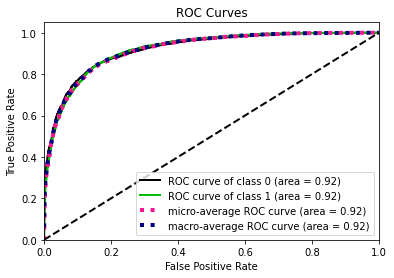

In [164]:
skplt.metrics.plot_roc(y_test,xgb_bow.predict_proba(cv_test))

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

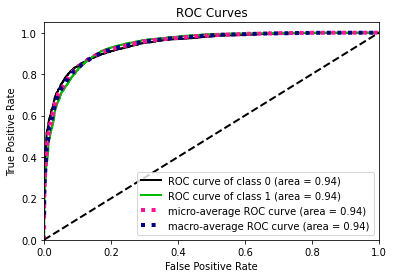

In [165]:
skplt.metrics.plot_roc(y_test,xgb_tfidf.predict_proba(tv_test))

In [104]:
from sklearn.svm import SVC
svm_clf = SVC(class_weight='balanced',random_state=111)
svm_tfidf=svm_clf.fit(tv_train,y_train)

In [106]:
#Predicting the model for tfidf features
svm_tfidf_predict=svm_tfidf.predict(tv_test)
print(svm_tfidf_predict)

[1 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]


In [110]:
print(report(y_test,svm_tfidf_predict, svm_tfidf.classes_ ))

accuracy_score:
 0.8915040906230334

Confusion Matrix:
      0     1
0  3452   511
1   351  3631

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3963
           1       0.88      0.91      0.89      3982

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



In [117]:
# Random forest
# n_jobs=-1 to allow run it on all cores
# params = {
#     'n_estimators': [100, 200, 500],
#     'criterion': ['gini', 'entropy'],
#     'min_samples_split': [1,2,4,5],
#     'min_samples_leaf': [1,2,4,5],
#     'max_leaf_nodes': [4,10,20,50,None]
# }

# gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
# gs1.fit(tv_train, y_train)

# print('Best score:', gs1.best_score_)
# print('Best score:', gs1.best_params_)

In [118]:
rf=RandomForestClassifier()
rf_bow=rf.fit(cv_train,y_train)
print(rf_bow)

rf_tfidf=rf.fit(tv_train,y_train)
print(rf_tfidf)

RandomForestClassifier()
RandomForestClassifier()


In [119]:
#Predicting the model for bag of words
rf_bow_predict=rf_bow.predict(cv_test)
print(rf_bow_predict)
#Predicting the model for tfidf features
rf_tfidf_predict=rf_tfidf.predict(tv_test)
print(rf_tfidf_predict)

[0 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]


In [120]:
print(report(y_test,rf_bow_predict, rf_bow.classes_ ))

accuracy_score:
 0.8169918187539333

Confusion Matrix:
      0     1
0  3460   503
1   951  3031

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.83      3963
           1       0.86      0.76      0.81      3982

    accuracy                           0.82      7945
   macro avg       0.82      0.82      0.82      7945
weighted avg       0.82      0.82      0.82      7945



In [121]:
print(report(y_test,rf_tfidf_predict, rf_tfidf.classes_ ))

accuracy_score:
 0.849842668344871

Confusion Matrix:
      0     1
0  3400   563
1   630  3352

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3963
           1       0.86      0.84      0.85      3982

    accuracy                           0.85      7945
   macro avg       0.85      0.85      0.85      7945
weighted avg       0.85      0.85      0.85      7945



In [76]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [77]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_valid_sequences = tokenizer.texts_to_sequences(valid["l_essay"])
X_test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences= tokenizer.texts_to_sequences(test["l_essay"])

In [78]:
max_len = np.max(train['l_essay'].apply(lambda x :len(x)))
max_len 

8076

In [79]:
# Is the total vocabulary size + padding token
num_features = len(tokenizer.index_word) + 1
print(num_features)

133071


In [81]:
embedding_dim = 64

In [82]:
from keras.preprocessing.sequence import pad_sequences
x_train =  pad_sequences(
    sequences=X_train_sequences,
    maxlen=int(max_len), 
    padding="pre", 
    truncating="pre", 
    value=0
)

x_valid =  pad_sequences(
    sequences=X_valid_sequences,
    maxlen=int(max_len), 
    padding="pre", 
    truncating="pre", 
    value=0
)

x_test =  pad_sequences(
    sequences=X_test_sequences,
    maxlen=int(max_len), 
    padding="pre", 
    truncating="pre", 
    value=0
)

test_x =  pad_sequences(
    sequences=test_sequences,
    maxlen=int(max_len), 
    padding="pre", 
    truncating="pre", 
    value=0
)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Embedding(num_features, embedding_dim, input_length=max_len))
model.add(Dropout(0.6))
model.add(LSTM(8, return_sequences=True))
model.add(Dropout(0.5))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

In [103]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers
model = keras.Sequential()
model.add(layers.Embedding(num_features, embedding_dim, input_length=max_len))
model.add(Dropout(0.5))
model.add(layers.GRU(2))
model.add(Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8076, 64)          8516544   
_________________________________________________________________
dropout (Dropout)            (None, 8076, 64)          0         
_________________________________________________________________
gru (GRU)                    (None, 2)                 408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 2)                 0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2)                 8         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 8,516,963
Trainable params: 8,516,959
Non-trainable params: 4
______________________________________________

In [89]:
import tensorflow as tf
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.0001, patience=3, verbose=0)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0)

In [90]:
y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)
type(y_train)
type(y_valid)

numpy.ndarray

In [105]:
# from keras.backend import clear_session
# clear_session()
keras.backend.clear_session()

In [102]:
del model

In [106]:
history = model.fit(x_train, y_train,
                    epochs=6,
                    verbose=True,
                    validation_data=(x_valid, y_valid),
                    callbacks=[lr_reduce,es_callback],
                    batch_size=50)

2022-12-26 11:11:20.906582: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1026556512 exceeds 10% of free system memory.


Epoch 1/6
636/636 [==============================] - 185s 288ms/step - loss: 0.6603 - accuracy: 0.6219 - val_loss: 0.4429 - val_accuracy: 0.8127
Epoch 2/6
636/636 [==============================] - 183s 287ms/step - loss: 0.4186 - accuracy: 0.7858 - val_loss: 0.3206 - val_accuracy: 0.8701
Epoch 3/6
636/636 [==============================] - 183s 287ms/step - loss: 0.3286 - accuracy: 0.8284 - val_loss: 0.3235 - val_accuracy: 0.8673
Epoch 4/6
636/636 [==============================] - 183s 287ms/step - loss: 0.2873 - accuracy: 0.8445 - val_loss: 0.3256 - val_accuracy: 0.8683
Epoch 5/6
636/636 [==============================] - 182s 287ms/step - loss: 0.2625 - accuracy: 0.8537 - val_loss: 0.3466 - val_accuracy: 0.8637
Epoch 6/6
636/636 [==============================] - 183s 288ms/step - loss: 0.2444 - accuracy: 0.8612 - val_loss: 0.3461 - val_accuracy: 0.8663


Training Accuracy: 0.9918
Testing Accuracy:  0.8712


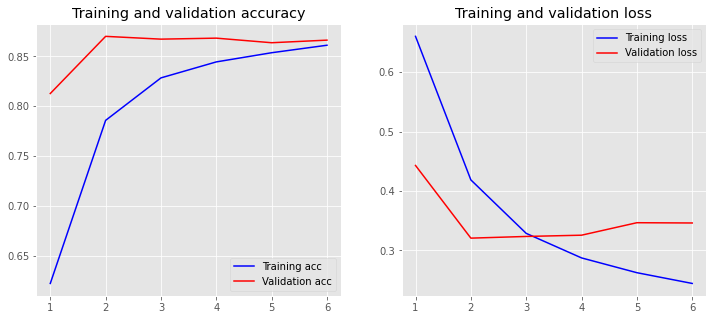

In [107]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [108]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

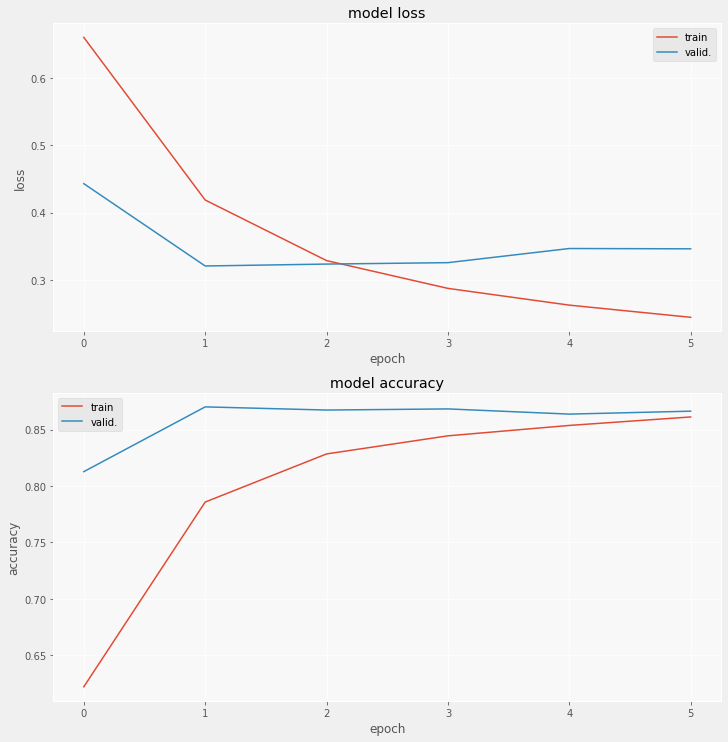

In [109]:
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 211)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 212)

In [119]:
pred=[]

In [120]:
y_test_predicted = model.predict(test_x)

In [121]:
threshold = 0.7

In [122]:
for i in range(5000):
    if y_test_predicted[i]>= threshold:
        pred.append(1)
    else:
        pred.append(0)

In [123]:
pred

[1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,


In [124]:
df=pd.read_csv('../input/shai-training-2022-a-level-2/sample_submission.csv')

In [125]:
df

,id,label
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
4995,4995,NaN
4996,4996,NaN
4997,4997,NaN
4998,4998,NaN


In [126]:
df['label']=pred

In [127]:
df[df['label']==1]

,id,label
0,0,1
3,3,1
5,5,1
11,11,1
17,17,1
...,...,...
4989,4989,1
4991,4991,1
4993,4993,1
4995,4995,1


In [145]:
df.to_csv('submissions.csv', index=False)

In [141]:
df

,id,label
0,0,1
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
4995,4995,1
4996,4996,1
4997,4997,0
4998,4998,0
